## Introduction

Global warming is a very serious situation that I have heard about for a good amount of my life. But despite hearing about this issue for so long, I really don't know how hot it has been getting over the years, nor do I know how to determine that value. This project aims to give me those answers, while comparing the North and South Hemispheres.

We will identify and isolate the long-term warming trend through sea surface temperature and forecast it just shy of four decades into the future.

For the additional step portion, we will also look at wave heights for each hemisphere to determine which side has the biggest waves.

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from scipy.signal import welch
from scipy.ndimage import uniform_filter1d
from scipy.ndimage import median_filter
from prophet import Prophet

## The data

Data: We will use data queried from the [ERA5 Reanalysis Product](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview). A reanalysis is a dataset that combines historical observations (which we trust within the uncertainty of the instrument used to make the measurement, but cannot feasibly cover the entire world) with a physics-based computer model of the earth system (which is not generally as accurate as a measurement, but can at least cover the entire world) to produce consistent global datasets of all variables we are interested in. ERA5 is produced by the European Center for Medium-Range Weather Forecasting (ECMWF), widely regarded as the best forecasting center in the world. Therefore, it is the preferred data product for studying how the Earth's climate has evolved over the past century.

## Load the data

In [56]:
arctic = pd.read_csv("https://raw.githubusercontent.com/SlimNaka/Climate/main/arctic.csv")
indian = pd.read_csv("https://raw.githubusercontent.com/SlimNaka/Climate/main/indian.csv")
north_atlantic = pd.read_csv("https://raw.githubusercontent.com/SlimNaka/Climate/main/north_atlantic.csv")
north_pacific = pd.read_csv("https://raw.githubusercontent.com/SlimNaka/Climate/main/north_pacific.csv")
south_atlantic = pd.read_csv("https://raw.githubusercontent.com/SlimNaka/Climate/main/south_atlantic.csv")
south_pacific = pd.read_csv("https://raw.githubusercontent.com/SlimNaka/Climate/main/south_pacific.csv")
southern = pd.read_csv("https://raw.githubusercontent.com/SlimNaka/Climate/main/southern.csv")

## Explore the contents of the data sets

In [ ]:
arctic.head()

,sst,u10,hsig,time,latitude,longitude
0,271.45996,0.009604,NaN,1940-01-01 12:00:00,70.0,-140.1
1,271.45996,6.529120,NaN,1940-01-02 12:00:00,70.0,-140.1
2,271.45996,5.675279,NaN,1940-01-03 12:00:00,70.0,-140.1
3,271.45996,-10.479511,NaN,1940-01-04 12:00:00,70.0,-140.1
4,271.45996,-14.644253,NaN,1940-01-05 12:00:00,70.0,-140.1


In [ ]:
arctic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30747 entries, 0 to 30746
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sst        30747 non-null  float64
 1   u10        30747 non-null  float64
 2   hsig       6123 non-null   float64
 3   time       30747 non-null  object 
 4   latitude   30747 non-null  float64
 5   longitude  30747 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.4+ MB


In [ ]:
indian.head()

,sst,u10,hsig,time,latitude,longitude
0,301.70090,3.659115,1.100253,1940-01-01 12:00:00,-5.1,65.0
1,301.73440,2.840900,1.051336,1940-01-02 12:00:00,-5.1,65.0
2,301.77050,2.777153,1.050579,1940-01-03 12:00:00,-5.1,65.0
3,301.80347,2.278424,1.051119,1940-01-04 12:00:00,-5.1,65.0
4,301.83524,2.847650,1.147332,1940-01-05 12:00:00,-5.1,65.0


In [ ]:
indian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sst        30745 non-null  float64
 1   u10        30745 non-null  float64
 2   hsig       30745 non-null  float64
 3   time       30745 non-null  object 
 4   latitude   30745 non-null  float64
 5   longitude  30745 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.4+ MB


In [ ]:
north_atlantic.head()

,sst,u10,hsig,time,latitude,longitude
0,292.86615,10.328670,4.153670,1940-01-01 12:00:00,35.9,-41.1
1,292.79900,7.875400,3.853531,1940-01-02 12:00:00,35.9,-41.1
2,292.73737,11.206657,3.518368,1940-01-03 12:00:00,35.9,-41.1
3,292.67316,11.615847,4.042061,1940-01-04 12:00:00,35.9,-41.1
4,292.61040,15.107924,5.225357,1940-01-05 12:00:00,35.9,-41.1


In [ ]:
north_atlantic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sst        30745 non-null  float64
 1   u10        30745 non-null  float64
 2   hsig       30745 non-null  float64
 3   time       30745 non-null  object 
 4   latitude   30745 non-null  float64
 5   longitude  30745 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.4+ MB


In [ ]:
north_pacific.head()

,sst,u10,hsig,time,latitude,longitude
0,286.97070,0.612978,4.136298,1940-01-01 12:00:00,34.9,-165.0
1,286.97836,2.574189,2.759662,1940-01-02 12:00:00,34.9,-165.0
2,287.01630,2.623150,1.873087,1940-01-03 12:00:00,34.9,-165.0
3,287.02680,-1.868878,1.753748,1940-01-04 12:00:00,34.9,-165.0
4,287.03183,3.412738,2.692871,1940-01-05 12:00:00,34.9,-165.0


In [ ]:
north_pacific.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30741 entries, 0 to 30740
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sst        30741 non-null  float64
 1   u10        30741 non-null  float64
 2   hsig       30741 non-null  float64
 3   time       30741 non-null  object 
 4   latitude   30741 non-null  float64
 5   longitude  30741 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.4+ MB


In [ ]:
south_atlantic.head()

,sst,u10,hsig,time,latitude,longitude
0,295.14398,-2.858145,1.880945,1940-01-01 12:00:00,-30.1,-16.1
1,295.19820,-10.065320,2.357849,1940-01-02 12:00:00,-30.1,-16.1
2,295.24457,-4.187378,1.975307,1940-01-03 12:00:00,-30.1,-16.1
3,295.29690,5.083636,1.438365,1940-01-04 12:00:00,-30.1,-16.1
4,295.34857,-4.042992,1.379800,1940-01-05 12:00:00,-30.1,-16.1


In [ ]:
south_atlantic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30746 entries, 0 to 30745
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sst        30746 non-null  float64
 1   u10        30746 non-null  float64
 2   hsig       30746 non-null  float64
 3   time       30746 non-null  object 
 4   latitude   30746 non-null  float64
 5   longitude  30746 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.4+ MB


In [ ]:
south_pacific.head()

,sst,u10,hsig,time,latitude,longitude
0,291.74900,1.479218,2.039036,1940-01-01 12:00:00,-35.0,-165.0
1,291.80466,0.636111,1.567293,1940-01-02 12:00:00,-35.0,-165.0
2,291.85544,3.894659,1.214057,1940-01-03 12:00:00,-35.0,-165.0
3,291.90817,3.991070,2.437233,1940-01-04 12:00:00,-35.0,-165.0
4,291.95996,2.706026,2.678540,1940-01-05 12:00:00,-35.0,-165.0


In [ ]:
south_pacific.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30741 entries, 0 to 30740
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sst        30741 non-null  float64
 1   u10        30741 non-null  float64
 2   hsig       30741 non-null  float64
 3   time       30741 non-null  object 
 4   latitude   30741 non-null  float64
 5   longitude  30741 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.4+ MB


In [ ]:
southern.head()

,sst,u10,hsig,time,latitude,longitude
0,272.10916,4.541269,1.452581,1940-01-01 12:00:00,-65.1,-170.1
1,272.11035,-3.956249,1.155471,1940-01-02 12:00:00,-65.1,-170.1
2,272.11185,-3.605822,2.097244,1940-01-03 12:00:00,-65.1,-170.1
3,272.11230,2.553711,2.646210,1940-01-04 12:00:00,-65.1,-170.1
4,272.11330,2.636921,1.728733,1940-01-05 12:00:00,-65.1,-170.1


In [ ]:
southern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30747 entries, 0 to 30746
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sst        30747 non-null  float64
 1   u10        30747 non-null  float64
 2   hsig       22049 non-null  float64
 3   time       30747 non-null  object 
 4   latitude   30747 non-null  float64
 5   longitude  30747 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.4+ MB


## Organization

Generate dataframe with the relevent subsets of average sea surface temperature (in Celsius) and the respective dates for both the Northern and Southern Hemispheres.

In [ ]:
k = 273.15 # difference between K and C temps.
north_sst_c = pd.DataFrame( #sst = sea surface temperature
    (arctic["sst"] - k) +
    (north_atlantic["sst"] - k) +
    (north_pacific["sst"] - k)
          )/3

south_sst_c = pd.DataFrame(
     # (indian["sst"] - k) + # Note that while the Indian Ocean spans over both the northern and southern hemisphere, it's mostly in the south.
     (south_atlantic["sst"] - k) +
     (south_pacific["sst"] - k) +
     (southern["sst"] - k)
          )/3

north_sst_c = north_sst_c.dropna() # We are only looking at entries where all north oceans have data.
south_sst_c = south_sst_c.dropna() # We are only looking at entries where all south oceans have data.

extracted_col = north_pacific["time"] # North Pacific has the least amount of entries (same value for south).

north_sst_c = pd.concat([north_sst_c, extracted_col.rename("date")], axis=1)
south_sst_c = pd.concat([south_sst_c, extracted_col.rename("date")], axis=1)

Adjusting dates/time and converting data types

In [ ]:
# Code below removes the time of day, leaving only the date
# and converts that date to datetime type.
date_list = []
for i in north_sst_c["date"]:
  i = i.replace(" 12:00:00","")
  date_list.append(i)
north_sst_c["date"] = date_list
south_sst_c["date"] = date_list

north_sst_c["date"] = pd.to_datetime(north_sst_c["date"])
south_sst_c["date"] = pd.to_datetime(south_sst_c["date"])

In [ ]:
north_sst_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30741 entries, 0 to 30740
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   sst     30741 non-null  float64       
 1   date    30741 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 720.5 KB


In [ ]:
north_sst_c.head()

,sst,date
0,10.615603,1940-01-01
1,10.595773,1940-01-02
2,10.587877,1940-01-03
3,10.569973,1940-01-04
4,10.550730,1940-01-05


In [ ]:
south_sst_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30741 entries, 0 to 30740
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   sst     30741 non-null  float64       
 1   date    30741 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 720.5 KB


In [ ]:
south_sst_c.head()

,sst,date
0,13.184047,1940-01-01
1,13.221070,1940-01-02
2,13.253953,1940-01-03
3,13.289123,1940-01-04
4,13.323943,1940-01-05


## Spectral Analysis

Let's look at the two hemisphere's temperatures, as well as the Power Spectral Density, together to see if we can spot any glaring trends.

In [ ]:
sst_n = north_sst_c["sst"].values
sst_s = south_sst_c["sst"].values
n = len(sst_n)  # Total length (same for south)
t = np.arange(n)  # Daily data, so the time vector starts at 0 and ends at n - 1
dt = t[1] - t[0]  # Sampling interval dt = 1 day
fs = 1 / dt  # Sampling frequency fs = 1 sample/day (often abbreviated cpd for cycles per day)
f0 = (1 / n) / dt  # Frequency resolution
p = int((n - 1) / 2)

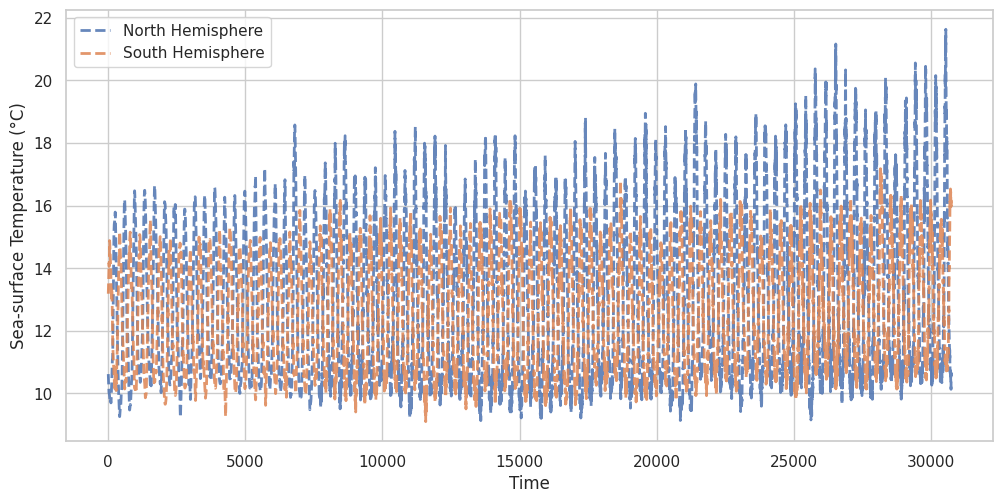

In [ ]:
# Plotting the observed and forecasted data
fig, ax = plt.subplots()

# Plotting the observed data
ax.plot(sst_n, '--', linewidth=2, label="North Hemisphere", alpha = 0.85)
ax.plot(sst_s, '--', linewidth=2, label="South Hemisphere", alpha = 0.85)

ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("Sea-surface Temperature (°C)")
fig.set_size_inches(10, 5)
fig.tight_layout(pad=0.5)
plt.show()

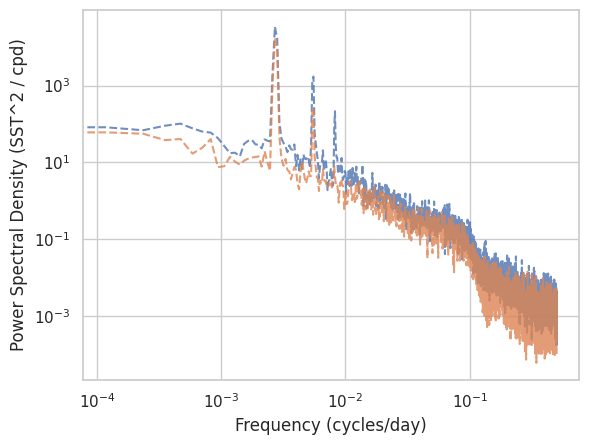

In [ ]:
fn, Pwn = welch(sst_n, fs=1.0, window="hamming", nperseg=8500)
fs, Pws = welch(sst_s, fs=1.0, window="hamming", nperseg=8500)
fig, ax = plt.subplots()
ax.plot(fn, Pwn, "--", alpha = 0.8)
ax.plot(fs, Pws, "--", alpha = 0.8)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Frequency (cycles/day)")
ax.set_ylabel("Power Spectral Density (SST^2 / cpd)")
plt.show()

Hard to see trends here. Let's try another way.

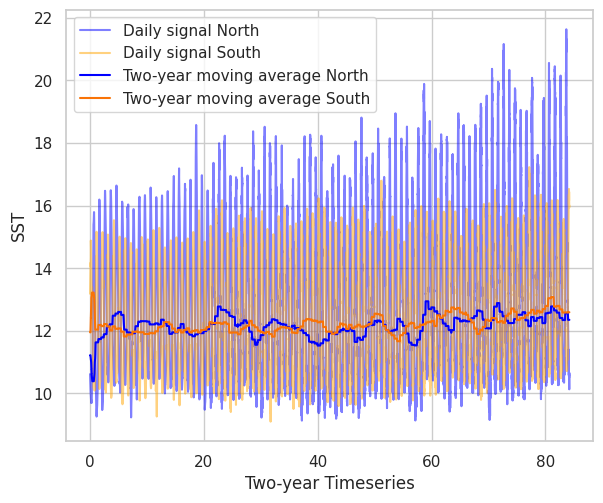

In [ ]:
t = np.arange(len(sst_n))

window_len = 365*2  # two year moving average
sst_n_ma = median_filter(sst_n, size=window_len)
sst_s_ma = median_filter(sst_s, size=window_len)

fig, ax = plt.subplots()
ax.plot(t / 365, sst_n, alpha=0.5, label="Daily signal North", color = "blue")
ax.plot(t / 365, sst_s, alpha=0.5, label="Daily signal South", color = "#FFA500")
ax.plot(t / 365, sst_n_ma, label="Two-year moving average North", color = "blue")
ax.plot(t / 365, sst_s_ma, label="Two-year moving average South", color = "#F97306")
ax.set_xlabel("Two-year Timeseries")
ax.set_ylabel("SST")
ax.legend()
fig.set_size_inches(6, 5)
fig.tight_layout(pad=0.5)

Still tough. Let's try one more similar method.

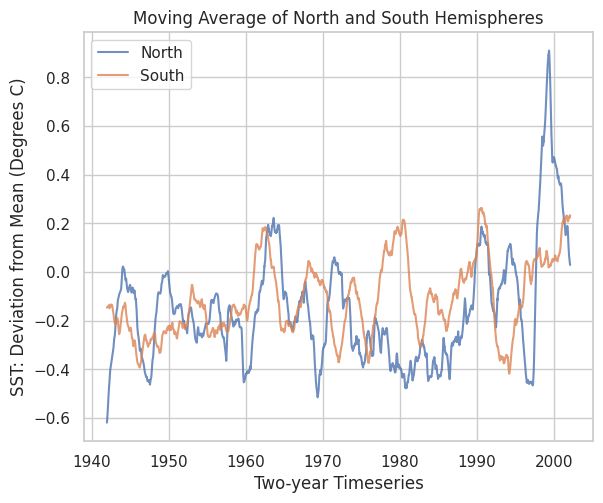

In [ ]:
df_fit_n = pd.DataFrame()
df_fit_n["ds"] = pd.to_datetime(north_sst_c["date"])
df_fit_n["y"] = uniform_filter1d(north_sst_c["sst"], 365 * 2)
north_mean = df_fit_n["y"].mean() # Make note of this mean temp value
df_fit_n["y"] = df_fit_n["y"] - north_mean
df_fit_n = df_fit_n.iloc[365 * 2:-365 * 2, :].reset_index(drop=True)

df_fit_s = pd.DataFrame()
df_fit_s["ds"] = pd.to_datetime(south_sst_c["date"])
df_fit_s["y"] = uniform_filter1d(south_sst_c["sst"], 365 * 2)
south_mean = df_fit_s["y"].mean() # Make note of this mean temp value
df_fit_s["y"] = df_fit_s["y"] - south_mean
df_fit_s = df_fit_s.iloc[365 * 2:-365 * 2, :].reset_index(drop=True)

train_indices_n = list(range(3 * len(df_fit_n) // 4))
test_indices_n = list(range(3 * len(df_fit_n) // 4, len(df_fit_n)))
df_train_n = df_fit_n.loc[train_indices_n]
df_test_n = df_fit_n.loc[test_indices_n]

train_indices_s = list(range(3 * len(df_fit_s) // 4))
test_indices_s = list(range(3 * len(df_fit_s) // 4, len(df_fit_s)))
df_train_s = df_fit_s.loc[train_indices_s]
df_test_s = df_fit_s.loc[test_indices_s]

fig, ax = plt.subplots()
ax.plot(df_train_n["ds"], df_train_n["y"], alpha=0.8, label="North")
ax.plot(df_train_s["ds"], df_train_s["y"], alpha=0.8, label="South")

ax.set_title("Moving Average of North and South Hemispheres")
ax.set_xlabel("Two-year Timeseries")
ax.set_ylabel("SST: Deviation from Mean (Degrees C)")
ax.legend()
fig.set_size_inches(6, 5)
fig.tight_layout(pad=0.5)

Make note of the mean temps for both hemispheres.

In [ ]:
print(f"North temp. mean: {north_mean}")
print(f"South temp. mean: {south_mean}")

North temp. mean: 12.943314859404124
South temp. mean: 12.47563560634373


Graph looks nice and easier to spot trends, especially ones where the two hemispheres are similar/opposite to each other.

Let's find the dates between 1960 and 1970 where both hemispheres have a higher temperature.

In [ ]:
start_date = "1960-01-01"
end_date = "1970-01-01"

filtered_df_n1 = df_train_n[(df_train_n['ds'] >= start_date) & (df_train_n['ds'] <= end_date)]
temperature_n = np.max(filtered_df_n1['y'])

filtered_df_s1 = df_train_s[(df_train_s['ds'] >= start_date) & (df_train_s['ds'] <= end_date)]
temperature_s = np.max(filtered_df_s1['y'])

if temperature_n in df_train_n["y"].values:
    output_value = df_train_n.loc[df_train_n["y"] == temperature_n, "ds"].iloc[0]
    print(f"Date of interest - North: {output_value}.")

if temperature_s in df_train_s["y"].values:
    output_value = df_train_s.loc[df_train_s["y"] == temperature_s, "ds"].iloc[0]
    print(f"Date of interest - South: {output_value}.")

Date of interest - North: 1963-08-16 00:00:00.
Date of interest - South: 1962-07-27 00:00:00.


Perhaps this was due to the very active ["Pacfic Typhoon Season of 1962."](https://en.wikipedia.org/wiki/1962_Pacific_typhoon_season) Although I could not find much regarding 1963.

Now let's find the dates between 1965 and 1970 where the hemispheres experience opposite temperatures.

In [ ]:
start_date = "1965-01-01"
end_date = "1970-01-01"

filtered_df_n1 = df_train_n[(df_train_n['ds'] >= start_date) & (df_train_n['ds'] <= end_date)]
temperature_n = np.min(filtered_df_n1['y'])

filtered_df_s1 = df_train_s[(df_train_s['ds'] >= start_date) & (df_train_s['ds'] <= end_date)]
temperature_s = np.max(filtered_df_s1['y'])

if temperature_n in df_train_n["y"].values:
    output_value = df_train_n.loc[df_train_n["y"] == temperature_n, "ds"].iloc[0]
    print(f"Date of interest - North: {output_value}.")

if temperature_s in df_train_s["y"].values:
    output_value = df_train_s.loc[df_train_s["y"] == temperature_s, "ds"].iloc[0]
    print(f"Date of interest - South: {output_value}.")

Date of interest - North: 1969-05-08 00:00:00.
Date of interest - South: 1968-03-10 00:00:00.


Perhaps this was due to the very active ["1969 Atlantic Hurrican Season."](https://en.wikipedia.org/wiki/1969_Atlantic_hurricane_season)

Now let's find the dates between 1970 and 1973 where the hemispheres experience opposite temperatures.

In [ ]:
start_date = "1970-01-01"
end_date = "1973-01-01"

filtered_df_n1 = df_train_n[(df_train_n['ds'] >= start_date) & (df_train_n['ds'] <= end_date)]
temperature_n = np.max(filtered_df_n1['y'])

filtered_df_s1 = df_train_s[(df_train_s['ds'] >= start_date) & (df_train_s['ds'] <= end_date)]
temperature_s = np.min(filtered_df_s1['y'])

if temperature_n in df_train_n["y"].values:
    output_value = df_train_n.loc[df_train_n["y"] == temperature_n, "ds"].iloc[0]
    print(f"Date of interest - North: {output_value}.")

if temperature_s in df_train_s["y"].values:
    output_value = df_train_s.loc[df_train_s["y"] == temperature_s, "ds"].iloc[0]
    print(f"Date of interest - South: {output_value}.")

Date of interest - North: 1971-07-11 00:00:00.
Date of interest - South: 1972-01-22 00:00:00.


Interesting. Each temp. (northern high and southern low) was during each hemisphere's summer time.

Now let's find the dates between 1990 and 1995 where both hemispheres experience high temperatures.

In [ ]:
start_date = "1990-01-01"
end_date = "1995-01-01"

filtered_df_n1 = df_train_n[(df_train_n['ds'] >= start_date) & (df_train_n['ds'] <= end_date)]
temperature_n = np.max(filtered_df_n1['y'])

filtered_df_s1 = df_train_s[(df_train_s['ds'] >= start_date) & (df_train_s['ds'] <= end_date)]
temperature_s = np.max(filtered_df_s1['y'])

if temperature_n in df_train_n["y"].values:
    output_value = df_train_n.loc[df_train_n["y"] == temperature_n, "ds"].iloc[0]
    print(f"Date of interest - North: {output_value}.")

if temperature_s in df_train_s["y"].values:
    output_value = df_train_s.loc[df_train_s["y"] == temperature_s, "ds"].iloc[0]
    print(f"Date of interest - South: {output_value}.")

Date of interest - North: 1990-08-10 00:00:00.
Date of interest - South: 1990-08-14 00:00:00.


Wow. Just a few days difference in time. Perhaps this was due to the very active ["1990 Atlantic Hurrican Season."](https://en.wikipedia.org/wiki/1990_Atlantic_hurricane_season)

Now let's take a last look at the huge peak in the Northern Hemisphere just before year 2000.

In [ ]:
start_date = "1995-01-01"
end_date = "2000-01-01"

filtered_df_n1 = df_train_n[(df_train_n['ds'] >= start_date) & (df_train_n['ds'] <= end_date)]
temperature_n = np.max(filtered_df_n1['y'])

if temperature_n in df_train_n["y"].values:
    output_value = df_train_n.loc[df_train_n["y"] == temperature_n, "ds"].iloc[0]
    print(f"Date of interest - North: {output_value}.")

Date of interest - North: 1999-05-18 00:00:00.


This was listed as one of the [anomalies of 1999.](https://www.ospo.noaa.gov/data/sst/anomaly/1999/anomnight.5.18.1999.gif)

## Time Series Forecasting

The Prophet Model is a popular and accurate one, so let's try that.

In [ ]:
north = Prophet(weekly_seasonality=False, daily_seasonality=False)
north.add_seasonality(name='2p5yr', period=910, fourier_order=15)
north.add_seasonality(name='5yr', period=365 * 5, fourier_order=25)
north.fit(df_train_n)
future_n = north.make_future_dataframe(periods=len(df_test_s)*3, freq="1D")
forecast_n = north.predict(future_n)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfe18gar_/3f5mt3yx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfe18gar_/x40qbzk8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31791', 'data', 'file=/tmp/tmpfe18gar_/3f5mt3yx.json', 'init=/tmp/tmpfe18gar_/x40qbzk8.json', 'output', 'file=/tmp/tmpfe18gar_/prophet_modeluhq7g1im/prophet_model-20240517181458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:14:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:16:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
south = Prophet(weekly_seasonality=False, daily_seasonality=False)
south.add_seasonality(name='2p5yr', period=910, fourier_order=15)
south.add_seasonality(name='5yr', period=365 * 5, fourier_order=25)
south.fit(df_train_s)
future_s = south.make_future_dataframe(periods=len(df_test_s)*3, freq="1D")
forecast_s = south.predict(future_s)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfe18gar_/0qbf8ncr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfe18gar_/24599j_e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72807', 'data', 'file=/tmp/tmpfe18gar_/0qbf8ncr.json', 'init=/tmp/tmpfe18gar_/24599j_e.json', 'output', 'file=/tmp/tmpfe18gar_/prophet_modelm4fphu1u/prophet_model-20240517181634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:16:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:17:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Plotting the forecasts

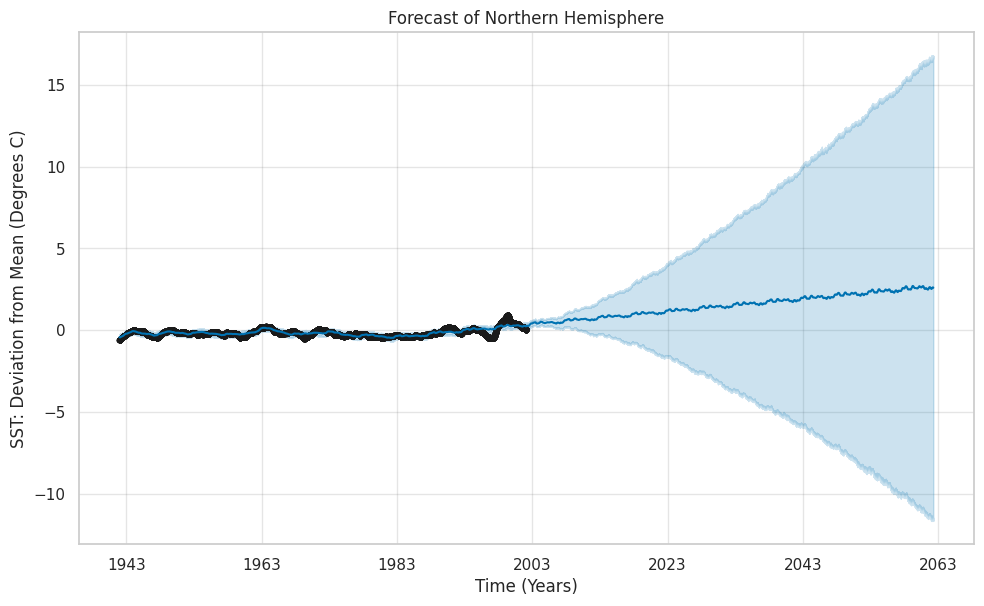

MAE = 0.14789931571502624


In [ ]:
mae_n = mean_absolute_error(df_fit_n["y"], forecast_n[:29281]['yhat'])
fig1 = north.plot(forecast_n)

ax = fig1.gca()
ax.set_title("Forecast of Northern Hemisphere")
ax.set_xlabel("Time (Years)")
ax.set_ylabel("SST: Deviation from Mean (Degrees C)")

plt.show()

print(f"MAE = {mae_n}")

In [ ]:
early_temp_n = forecast_n[1:365*5+2]["yhat"].mean()+north_mean # Avg temp. 5 years in the 40s.
future_temp_n = forecast_n[-(365*5+1):]["yhat"].mean()+north_mean # Avg temp. 5 years in the 50s and 60s.

print(f"From 1942 through 1946, the average sea surface temperature of the Northern Hemisphere was {early_temp_n} degrees C.")
print(f"It's projected that from mid 2057 through mid 2062, the average sea surface temperature of the Northern Hemisphere will be {future_temp_n} degrees C.")
print(f"That is a {future_temp_n - early_temp_n} degrees increase.")

From 1942 through 1946, the average sea surface temperature of the Northern Hemisphere was 12.731725921851247 degrees C.
It's projected that from mid 2057 through mid 2062, the average sea surface temperature of the Northern Hemisphere will be 15.512873868569834 degrees C.
That is a 2.781147946718587 degrees increase.


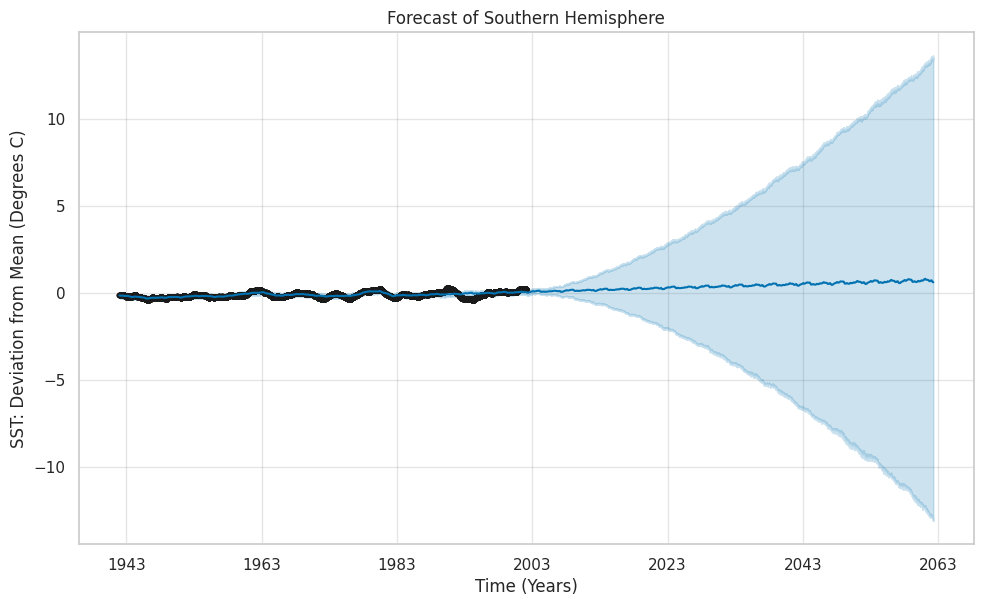

MAE = 0.0991934215801027


In [ ]:
mae_s = mean_absolute_error(df_fit_s["y"], forecast_s[:29281]['yhat'])
fig2 = south.plot(forecast_s)

ax = fig2.gca()
ax.set_title("Forecast of Southern Hemisphere")
ax.set_xlabel("Time (Years)")
ax.set_ylabel("SST: Deviation from Mean (Degrees C)")

plt.show()

print(f"MAE = {mae_s}")

In [ ]:
early_temp_s = forecast_s[1:365*5+2]["yhat"].mean()+south_mean # Avg temp. 5 years in the 40s.
future_temp_s = forecast_s[-(365*5+1):]["yhat"].mean()+south_mean # Avg temp. 5 years in the 50s and 60s.

print(f"From 1942 through 1946, the average sea surface temperature of the Southern Hemisphere was {early_temp_s} degrees C.")
print(f"It's projected that from mid 2057 through mid 2062, the average sea surface temperature of the Southern Hemisphere will be {future_temp_s} degrees C.")
print(f"That is a {future_temp_s - early_temp_s} degrees increase.")

From 1942 through 1946, the average sea surface temperature of the Southern Hemisphere was 12.242703106869717 degrees C.
It's projected that from mid 2057 through mid 2062, the average sea surface temperature of the Southern Hemisphere will be 13.170823315029956 degrees C.
That is a 0.9281202081602391 degrees increase.


## Additional step: Waves

Which hemisphere has the biggest waves?

Let's get a dataframe that will help answer that question.

### Organization

In [ ]:
north_hsig = pd.DataFrame( #hsig = wave height in meters pretty much
    (arctic["hsig"]) +
    (north_atlantic["hsig"]) +
    (north_pacific["hsig"])
          )/3

south_hsig = pd.DataFrame(
     # (indian["hsig"]) +
     (south_atlantic["hsig"]) +
     (south_pacific["hsig"]) +
     (southern["hsig"])
          )/3

north_hsig = north_hsig.dropna() # We are only looking at entries where all north oceans have data.
north_hsig = north_hsig.merge(north_pacific, left_index=True, right_index=True, how='left')
north_hsig = north_hsig.reset_index(drop=True)

south_hsig = south_hsig.dropna() # We are only looking at entries where all south oceans have data.
south_hsig = south_hsig.merge(south_pacific, left_index=True, right_index=True, how='left')
south_hsig = south_hsig.reset_index(drop=True)

north_hsig = north_hsig[["hsig_x", "time"]]
north_hsig = north_hsig.rename(columns = {"hsig_x":"hsig", "time":"date"})
north_hsig["date"] = pd.to_datetime(north_sst_c["date"])

south_hsig = south_hsig[["hsig_x", "time"]]
south_hsig = south_hsig.rename(columns = {"hsig_x":"hsig", "time":"date"})
south_hsig["date"] = pd.to_datetime(south_sst_c["date"])

In [ ]:
north_hsig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6123 entries, 0 to 6122
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   hsig    6123 non-null   float64       
 1   date    6123 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 95.8 KB


In [ ]:
north_hsig.describe()

,hsig,date
count,6123.000000,6123
mean,1.463732,1948-05-19 00:00:00
min,0.620091,1940-01-01 00:00:00
25%,1.120016,1944-03-10 12:00:00
50%,1.351401,1948-05-19 00:00:00
75%,1.698896,1952-07-27 12:00:00
max,4.893021,1956-10-05 00:00:00
std,0.470914,NaN


In [ ]:
south_hsig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22043 entries, 0 to 22042
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   hsig    22043 non-null  float64       
 1   date    22043 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 344.5 KB


In [ ]:
south_hsig.describe()

,hsig,date
count,22043.000000,22043
mean,2.634917,1970-03-05 00:00:00.000000015
min,1.164511,1940-01-01 00:00:00
25%,2.162246,1955-02-01 12:00:00
50%,2.556633,1970-03-05 00:00:00
75%,3.016042,1985-04-05 12:00:00
max,6.253431,2000-05-07 00:00:00
std,0.636247,NaN


Interesting. The mean and 5-number summary for the Southern Hemisphere are all larger when compared to the north, so it looks like the south side has bigger waves.

But let's do a little more to show that graphically.

In [ ]:
wave_df = north_hsig.merge(south_hsig, on="date", how='inner')

In [ ]:
wave_df = wave_df.rename(columns = {"hsig_x":"north","hsig_y":"south"})

south_hsig = south_hsig.rename(columns = {"hsig_x":"hsig", "time":"date"})

In [ ]:
wave_df = pd.melt(wave_df, id_vars = 'date', var_name = 'hemisphere', value_name = 'hsig')

In [ ]:
wave_df

,date,hemisphere,hsig
0,1940-01-01,north,1.037658
1,1940-01-02,north,1.007258
2,1940-01-03,north,1.101580
3,1940-01-04,north,0.891675
4,1940-01-05,north,0.883001
...,...,...,...
12241,1956-10-01,south,3.797807
12242,1956-10-02,south,2.701009
12243,1956-10-03,south,2.006564
12244,1956-10-04,south,2.563872


Now that we have a cleaned up dataframe, let's check how often waves of different sizes occur in each hemisphere.

### Additional Step Graphs

(0.0, 5.5)

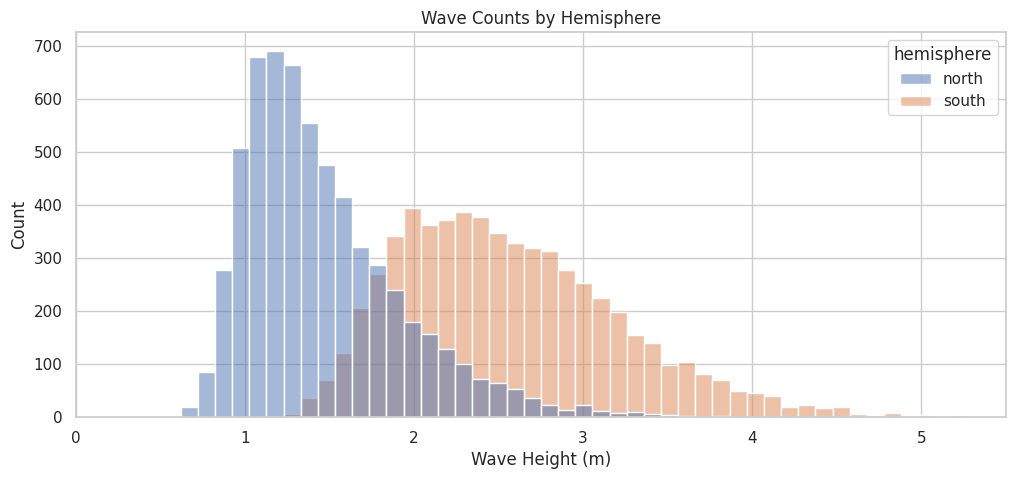

In [ ]:
plt.figure(figsize=(12, 5))
plt.xlabel("Wave Height (m)")
plt.title("Wave Counts by Hemisphere")
sns.histplot(data=wave_df, x="hsig", hue="hemisphere", bins="auto")
plt.xlim(0,5.5)

Looks like the Southern Hemisphere has much more frequent waves of 2 meters or more, but the north has much more of the smaller (less than 2 meters) waves.

Let's get a boxplot to compare the wave heights by month for both hemispheres.

([<matplotlib.axis.XTick at 0x7baeed20eef0>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sept'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

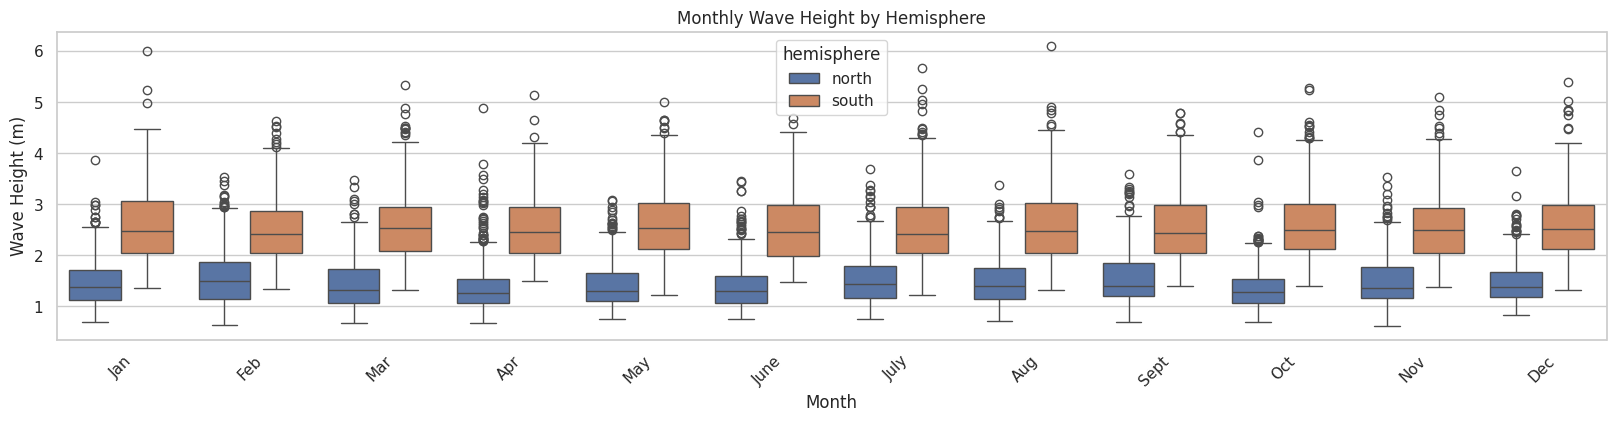

In [ ]:
wave_df["month"] = pd.DatetimeIndex(wave_df["date"]).month
wave_df["year"] = wave_df["date"].dt.year

plt.figure(figsize=(20,4))

plt.xlabel("Month")
plt.ylabel("Wave Height (m)")
plt.title("Monthly Wave Height by Hemisphere")
plt.legend(title='Hemisphere', title_fontsize='13', loc='upper left', fontsize='12', frameon=True, shadow=True)


sns.boxplot(data = wave_df, x = 'month', y = 'hsig', hue='hemisphere');
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], rotation=45)

Wow! From the data we have, with the same dates for each hemisphere, it's clear to see that the Southern Hemisphere gets much larger waves compared to the Northern Hemisphere.

## Conclusion

As stated in the introduction, my primary focus in this analysis was finding out how hot the earth is getting through both the Northern and Southern Hemispheres' sea surface temperature (SST).

After analyzing nearly 80 years of data collected in six of the seven seas, we've found that the Northern Hemisphere's SST was about 12.73 degrees C in the 1940s.
About 35 years from now, the average SST in the Northern Hemisphere is projected to be about 15.51 degrees C: about a 2.78 degrees increase.

Similarily, the Southern Hemisphere's SST was found to be about 12.24 degrees C in the 1940s. About 35 years from now, the average SST in the Southern Hemisphere is projected to be about 13.17 degrees C: about a 0.93 degrees increase.

The predictive models for the Northern and Southern Hemispheres have a 0.15 and 0.10 MAE respectively, indicating high accuracy.

For ocean waves, "big" and "large" are simply referring to wave height, and during an equal span of time, the Southern Hemisphere had much more frequent waves of 2 or more meters tall. When broken down monthly, the south also had the north beat in all twelve months of the year, making it the hemisphere with the largest waves.